In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../ift6758/data/preprocessed_data/preprocessed_game_data.csv")
df['is_goal'] = df['type'] == 'goal'

In [3]:
df

,game id,season,date,venue_location,home_team,away_team,event_id,period,timeInPeriod,timeRemaining,...,shooting_player_id,shooting_player_name,goalie_id,goalie_name,x_coord,y_coord,owner_team,shot_type,zone_code,is_goal
0,2017020001,20172018,2017-10-04,Winnipeg,Jets,Maple Leafs,54,1,00:38,19:22,...,8477504,Josh Morrissey,8475883.0,Frederik Andersen,-36.0,-28.0,52,wrist,O,False
1,2017020001,20172018,2017-10-04,Winnipeg,Jets,Maple Leafs,55,1,00:49,19:11,...,8473574,Shawn Matthias,8475883.0,Frederik Andersen,-75.0,1.0,52,wrist,O,False
2,2017020001,20172018,2017-10-04,Winnipeg,Jets,Maple Leafs,58,1,01:03,18:57,...,8473412,Bryan Little,8475883.0,Frederik Andersen,-73.0,10.0,52,backhand,O,False
3,2017020001,20172018,2017-10-04,Winnipeg,Jets,Maple Leafs,62,1,01:46,18:14,...,8470611,Eric Fehr,8473461.0,Steve Mason,80.0,-3.0,10,wrist,O,False
4,2017020001,20172018,2017-10-04,Winnipeg,Jets,Maple Leafs,68,1,03:42,16:18,...,8479339,Patrik Laine,8475883.0,Frederik Andersen,-44.0,-21.0,52,snap,O,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529388,2023021312,20232024,2024-04-18,Los Angeles,Kings,Blackhawks,935,3,09:00,11:00,...,8476479,Phillip Danault,8482821.0,Arvid Soderblom,-73.0,-27.0,26,wrist,O,False
529389,2023021312,20232024,2024-04-18,Los Angeles,Kings,Blackhawks,971,3,12:41,07:19,...,8482124,Quinton Byfield,8482821.0,Arvid Soderblom,-74.0,-21.0,26,wrist,O,False
529390,2023021312,20232024,2024-04-18,Los Angeles,Kings,Blackhawks,1024,3,17:28,02:32,...,8478882,Vladislav Gavrikov,8482821.0,Arvid Soderblom,-27.0,-27.0,26,slap,O,False
529391,2023021312,20232024,2024-04-18,Los Angeles,Kings,Blackhawks,1039,3,18:39,01:21,...,8478042,Viktor Arvidsson,8482821.0,Arvid Soderblom,-74.0,8.0,26,wrist,O,True


# Figure 3.1: most dangerous kind of shots ? most common type of shots ?
The most dangerous kind of shot seems to be the deflection (18% of chance of scoring). This makes sense because it's very hard for goalie to catch an imprevisible shot like this one.
It's also worth noting that the "tip-in" shot is very dangerous (16% chance of scoring), but it's also very difficult to make that shot. 
All the other shot types have less than 10% change of being goals.


The wrist shot is the most common, and not the most dangerous one. However, it's the shot that produces the highest number of goals overall.

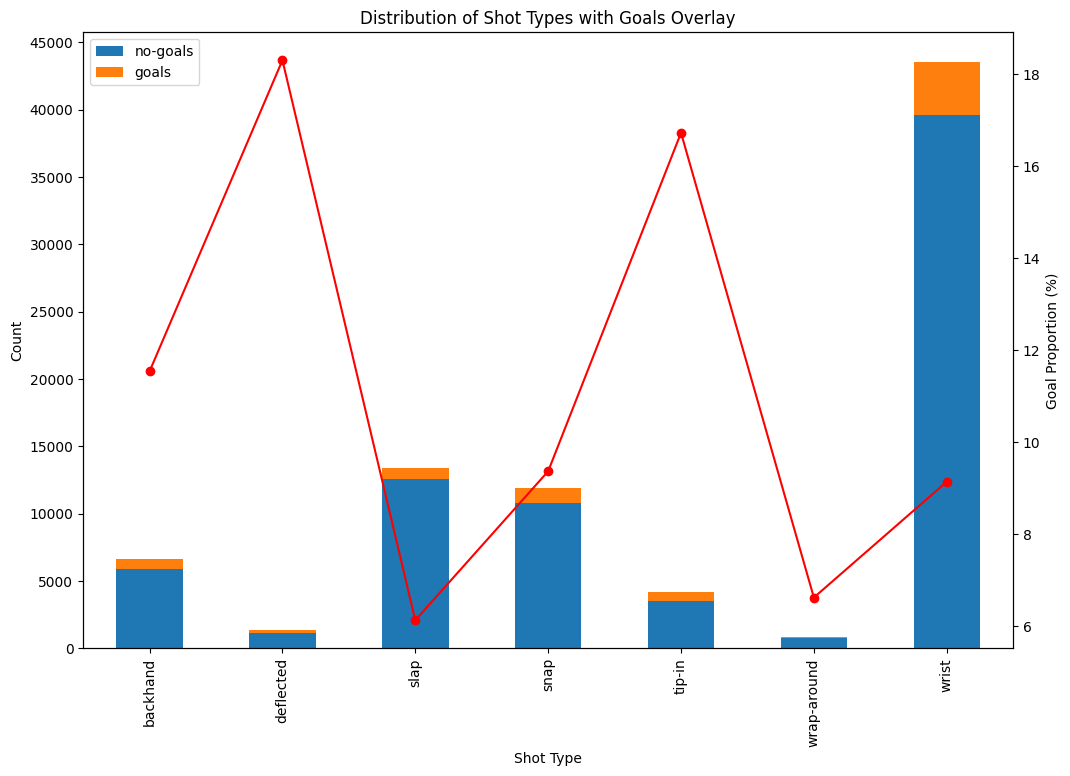

In [4]:
df_2017 = df[df['season'] == 20172018]

# Calculate the number of goals for each shot type
goal_counts = df_2017[df_2017['type'] == 'goal']['shot_type'].value_counts()
no_goal_counts = df_2017[df_2017['type'] == 'shot-on-goal']['shot_type'].value_counts()


# Overlay the number of goals over the number of shots
shot_type_distribution = pd.DataFrame({
    'no-goals': no_goal_counts,
    'goals': goal_counts
}).fillna(0)

# Calculate the proportion of goals per shot type
shot_type_distribution['goal_proportion'] = shot_type_distribution['goals'] / (shot_type_distribution['no-goals'] + shot_type_distribution['goals'])


# Plot the distribution of no-goals and goals
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot the bar chart for no-goals and goals
shot_type_distribution[['no-goals', 'goals']].plot(kind='bar', stacked=True, ax=ax1)
ax1.set_title('Distribution of Shot Types with Goals Overlay')
ax1.set_xlabel('Shot Type')
ax1.set_ylabel('Count')
y_ticks_labels = range(0, max(shot_type_distribution['no-goals'] + shot_type_distribution['goals']) + 5000, 5000)
ax1.set_yticks(y_ticks_labels)

# Create a secondary y-axis for the goal proportion
ax2 = ax1.twinx()
shot_type_distribution['goal_proportion'] *= 100 
shot_type_distribution['goal_proportion'].plot(kind='line', color='red', marker='o', ax=ax2)
ax2.set_ylabel('Goal Proportion (%)')

plt.show()

# Figure 3.2
- for 2017 season, high chance of scoring from high distance: less shots are attempted, and the few that score are because of the abscence of the goalie in front of net

## distance calculation and sanity checks

In [5]:
# Calculate the distance from the goal (assuming the goal is at (-100, 0) or (100, 0))
left_goal_coords = (-100+11, 0)
right_goal_coords = (100-11, 0)

def min_distance(row):
    left_goal_distance = ((row['x_coord'] - left_goal_coords[0])**2 + row['y_coord']**2)**0.5
    right_goal_distance = ((row['x_coord'] - right_goal_coords[0])**2 + row['y_coord']**2)**0.5
    return min(left_goal_distance, right_goal_distance)

df['distance'] = df.apply(min_distance, axis=1)

In [6]:
df

,game id,season,date,venue_location,home_team,away_team,event_id,period,timeInPeriod,timeRemaining,...,shooting_player_name,goalie_id,goalie_name,x_coord,y_coord,owner_team,shot_type,zone_code,is_goal,distance
0,2017020001,20172018,2017-10-04,Winnipeg,Jets,Maple Leafs,54,1,00:38,19:22,...,Josh Morrissey,8475883.0,Frederik Andersen,-36.0,-28.0,52,wrist,O,False,59.941638
1,2017020001,20172018,2017-10-04,Winnipeg,Jets,Maple Leafs,55,1,00:49,19:11,...,Shawn Matthias,8475883.0,Frederik Andersen,-75.0,1.0,52,wrist,O,False,14.035669
2,2017020001,20172018,2017-10-04,Winnipeg,Jets,Maple Leafs,58,1,01:03,18:57,...,Bryan Little,8475883.0,Frederik Andersen,-73.0,10.0,52,backhand,O,False,18.867962
3,2017020001,20172018,2017-10-04,Winnipeg,Jets,Maple Leafs,62,1,01:46,18:14,...,Eric Fehr,8473461.0,Steve Mason,80.0,-3.0,10,wrist,O,False,9.486833
4,2017020001,20172018,2017-10-04,Winnipeg,Jets,Maple Leafs,68,1,03:42,16:18,...,Patrik Laine,8475883.0,Frederik Andersen,-44.0,-21.0,52,snap,O,False,49.658836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529388,2023021312,20232024,2024-04-18,Los Angeles,Kings,Blackhawks,935,3,09:00,11:00,...,Phillip Danault,8482821.0,Arvid Soderblom,-73.0,-27.0,26,wrist,O,False,31.384710
529389,2023021312,20232024,2024-04-18,Los Angeles,Kings,Blackhawks,971,3,12:41,07:19,...,Quinton Byfield,8482821.0,Arvid Soderblom,-74.0,-21.0,26,wrist,O,False,25.806976
529390,2023021312,20232024,2024-04-18,Los Angeles,Kings,Blackhawks,1024,3,17:28,02:32,...,Vladislav Gavrikov,8482821.0,Arvid Soderblom,-27.0,-27.0,26,slap,O,False,67.623960
529391,2023021312,20232024,2024-04-18,Los Angeles,Kings,Blackhawks,1039,3,18:39,01:21,...,Viktor Arvidsson,8482821.0,Arvid Soderblom,-74.0,8.0,26,wrist,O,True,17.000000


In [7]:
df[df["distance"] < 1]


,game id,season,date,venue_location,home_team,away_team,event_id,period,timeInPeriod,timeRemaining,...,shooting_player_name,goalie_id,goalie_name,x_coord,y_coord,owner_team,shot_type,zone_code,is_goal,distance
20641,2017020321,20172018,2017-11-22,Sunrise,Panthers,Maple Leafs,960,5,00:00,05:00,...,Nick Bjugstad,8475883.0,Frederik Andersen,-89.0,0.0,13,snap,D,True,0.0
486041,2023020594,20232024,2024-01-04,St. Paul,Wild,Lightning,488,2,07:00,13:00,...,Darren Raddysh,8470594.0,Marc-Andre Fleury,-89.0,0.0,14,wrap-around,O,True,0.0
492395,2023020697,20232024,2024-01-18,Calgary,Flames,Maple Leafs,759,2,17:53,02:07,...,Andrew Mangiapane,8474889.0,Martin Jones,89.0,0.0,20,wrist,O,True,0.0
507466,2023020946,20232024,2024-02-29,Toronto,Maple Leafs,Coyotes,1046,3,09:52,10:08,...,Logan Cooley,8479361.0,Joseph Woll,89.0,0.0,53,wrist,O,True,0.0
521581,2023021181,20232024,2024-04-01,Columbus,Blue Jackets,Avalanche,1089,3,18:27,01:33,...,Cole Sillinger,NaN,NaN,89.0,0.0,29,tip-in,O,True,0.0
528545,2023021298,20232024,2024-04-16,Montreal,Canadiens,Red Wings,559,2,10:09,09:51,...,Cole Caufield,8473503.0,James Reimer,89.0,0.0,8,snap,O,True,0.0


In [8]:
df[df["distance"]>90]

,game id,season,date,venue_location,home_team,away_team,event_id,period,timeInPeriod,timeRemaining,...,shooting_player_name,goalie_id,goalie_name,x_coord,y_coord,owner_team,shot_type,zone_code,is_goal,distance
510,2017020008,20172018,2017-10-05,Ottawa,Senators,Capitals,298,2,09:00,11:00,...,Brooks Orpik,8467950.0,Craig Anderson,-6.0,35.0,15,slap,N,False,90.077744
2611,2017020039,20172018,2017-10-10,New York,Rangers,Blues,504,3,01:14,18:46,...,Alex Pietrangelo,8468685.0,Henrik Lundqvist,3.0,-39.0,19,wrist,N,False,94.429868
2934,2017020044,20172018,2017-10-10,Vancouver,Canucks,Senators,617,3,03:03,16:57,...,Mark Borowiecki,8474593.0,Jacob Markstrom,-4.0,-33.0,9,wrist,N,False,91.181138
3328,2017020050,20172018,2017-10-11,Los Angeles,Kings,Flames,330,2,06:35,13:25,...,Tanner Glass,8471734.0,Jonathan Quick,4.0,38.0,20,snap,N,False,93.107465
3589,2017020053,20172018,2017-10-12,Nashville,Predators,Stars,598,3,18:28,01:32,...,Marc Methot,8471469.0,Pekka Rinne,0.0,-29.0,25,wrist,N,False,93.605555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528638,2023021299,20232024,2024-04-16,Philadelphia,Flyers,Capitals,1213,3,19:46,00:14,...,Sean Couturier,8479292.0,Charlie Lindgren,0.0,-15.0,4,wrist,N,False,90.255194
528873,2023021303,20232024,2024-04-17,Elmont,Islanders,Penguins,961,3,07:23,12:37,...,Erik Karlsson,8478009.0,Ilya Sorokin,1.0,23.0,5,wrist,N,False,90.956033
529099,2023021307,20232024,2024-04-18,St. Paul,Wild,Kraken,424,2,00:08,19:52,...,Andre Burakovsky,8470594.0,Marc-Andre Fleury,-3.0,-34.0,55,tip-in,N,False,92.477024
529289,2023021311,20232024,2024-04-18,Paradise,Golden Knights,Ducks,122,1,01:51,18:09,...,William Karlsson,8480843.0,Lukas Dostal,1.0,26.0,54,wrist,N,False,91.760558


In [9]:
df[df["distance"]>95].is_goal.value_counts()

is_goal
False    454
True      15
Name: count, dtype: int64

In [10]:
# all of the long distance goals are scored without a goalie defending the net
df_2017 = df[df['season'] == 20172018]
df_2017[(df_2017["distance"] > 95) & (df_2017["distance"] < 100) & (df["goalie_id"].isna())].is_goal.value_counts()

C:\Users\dre\AppData\Local\Temp\ipykernel_15588\3264622284.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2017[(df_2017["distance"] > 95) & (df_2017["distance"] < 100) & (df["goalie_id"].isna())].is_goal.value_counts()


is_goal
True    3
Name: count, dtype: int64

In [11]:
df_2017[(df_2017["distance"] > 95) & (df_2017["distance"] < 100)]

,game id,season,date,venue_location,home_team,away_team,event_id,period,timeInPeriod,timeRemaining,...,shooting_player_name,goalie_id,goalie_name,x_coord,y_coord,owner_team,shot_type,zone_code,is_goal,distance
4976,2017020077,20172018,2017-10-15,Paradise,Golden Knights,Bruins,85,1,16:30,03:30,...,David Krejci,8476876.0,Malcolm Subban,1.0,-36.0,6,wrist,N,False,95.078915
6366,2017020099,20172018,2017-10-19,Ottawa,Senators,Devils,66,1,02:06,17:54,...,Stefan Noesen,8467950.0,Craig Anderson,-1.0,39.0,1,tip-in,N,False,96.254870
6443,2017020100,20172018,2017-10-19,Chicago,Blackhawks,Oilers,9,1,00:23,19:37,...,Adam Larsson,8476341.0,Anton Forsberg,-1.0,-36.0,22,wrist,N,False,95.078915
7591,2017020117,20172018,2017-10-21,Columbus,Blue Jackets,Kings,491,3,02:03,17:57,...,Markus Nutivaara,8471734.0,Jonathan Quick,1.0,-38.0,29,backhand,N,False,95.854056
7901,2017020122,20172018,2017-10-22,Detroit,Red Wings,Canucks,215,2,03:25,16:35,...,Nick Jensen,8474593.0,Jacob Markstrom,1.0,-38.0,17,wrist,N,False,95.854056
12632,2017020196,20172018,2017-11-02,Glendale,Coyotes,Sabres,338,2,09:05,10:55,...,Rasmus Ristolainen,8477293.0,Antti Raanta,1.0,-37.0,7,wrist,N,False,95.462034
14155,2017020219,20172018,2017-11-06,New York,Rangers,Blue Jackets,341,2,13:55,06:05,...,Zac Dalpe,8468685.0,Henrik Lundqvist,1.0,-38.0,29,backhand,N,False,95.854056
16891,2017020262,20172018,2017-11-12,Chicago,Blackhawks,Devils,691,3,19:13,00:47,...,Drew Stafford,8476341.0,Anton Forsberg,2.0,-39.0,1,wrist,N,False,95.341491
18191,2017020283,20172018,2017-11-16,St. Paul,Wild,Predators,589,3,04:07,15:53,...,Ryan Suter,8471469.0,Pekka Rinne,-2.0,-39.0,30,slap,N,False,95.341491
22098,2017020344,20172018,2017-11-24,St. Louis,Blues,Predators,284,2,08:44,11:16,...,Chris Thorburn,8471469.0,Pekka Rinne,1.0,-39.0,19,wrist,N,False,96.254870


## plotting

C:\Users\dre\AppData\Local\Temp\ipykernel_15588\364079169.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  goal_counts = df_2017[df_2017['type'] == 'goal'].groupby(distance_bins).size()
C:\Users\dre\AppData\Local\Temp\ipykernel_15588\364079169.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  no_goal_counts = df_2017[df_2017['type'] == 'shot-on-goal'].groupby(distance_bins).size()


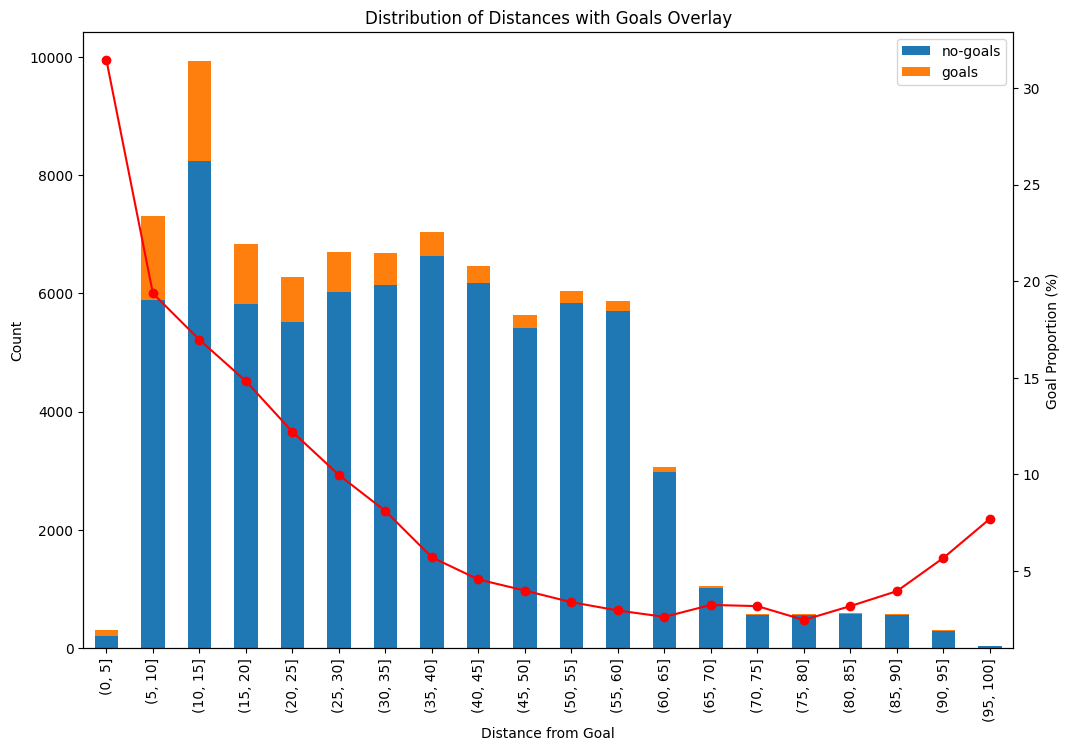

In [15]:

# Create bins for distance
df_2017 = df[df['season'] == 20172018]
bins = list(range(0, int(max(df["distance"])) + 5, 5))
distance_bins = pd.cut(df_2017['distance'], bins=bins)

# Calculate the number of goals for each distance bin
goal_counts = df_2017[df_2017['type'] == 'goal'].groupby(distance_bins).size()
no_goal_counts = df_2017[df_2017['type'] == 'shot-on-goal'].groupby(distance_bins).size()

# Overlay the number of goals over the number of shots
shot_type_distribution = pd.DataFrame({
    'no-goals': no_goal_counts,
    'goals': goal_counts
}).fillna(0)

# Calculate the proportion of goals per shot type
shot_type_distribution['goal_proportion'] = shot_type_distribution['goals'] / ( shot_type_distribution['no-goals'] + shot_type_distribution['goals'])

# Plot the distribution of no-goals and goals
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot the bar chart for no-goals and goals
shot_type_distribution[['no-goals', 'goals']].plot(kind='bar', stacked=True, ax=ax1)
ax1.set_title('Distribution of Distances with Goals Overlay')
ax1.set_xlabel('Distance from Goal')
ax1.set_ylabel('Count')

# Secondary y-axis for the goal proportion
ax2 = ax1.twinx()
shot_type_distribution['goal_proportion'] *= 100 
shot_type_distribution['goal_proportion'].plot(kind='line', color='red', marker='o', ax=ax2)
ax2.set_ylabel('Goal Proportion (%)')


plt.show()

# figure 3.3
distance bining is the same as last figure -> interval of 5 feet ok ?


C:\Users\dre\AppData\Local\Temp\ipykernel_15588\2893569341.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  goal_percentage = df_2017.groupby([distance_bins, 'shot_type'])['is_goal'].mean().reset_index()


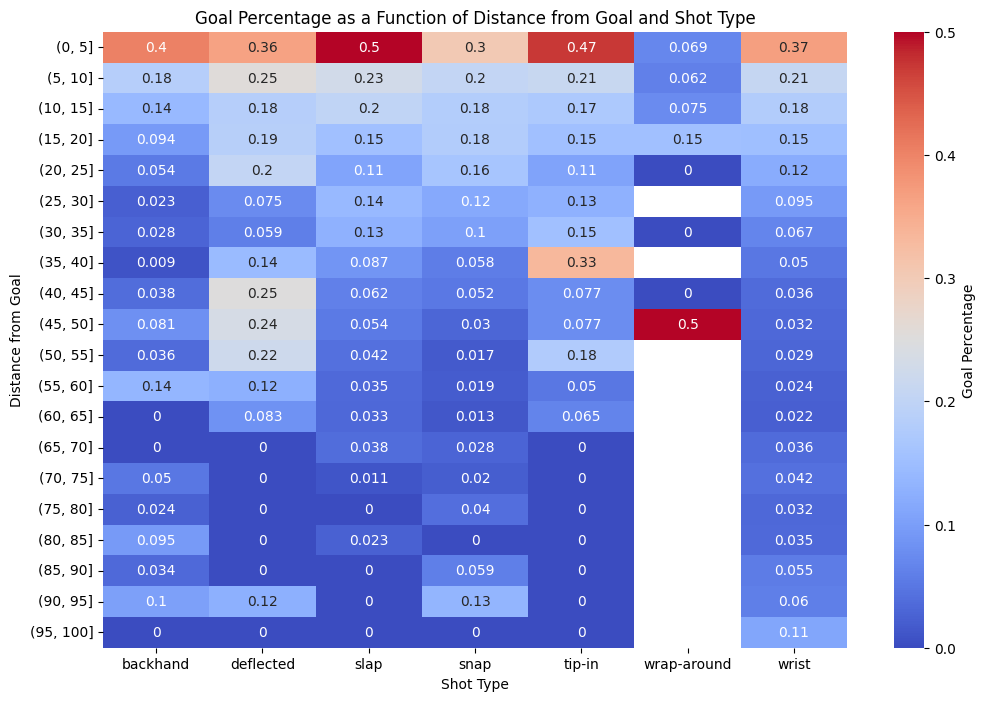

In [17]:
# Calculate goal percentage for each combination of distance bin and shot type
goal_percentage = df_2017.groupby([distance_bins, 'shot_type'])['is_goal'].mean().reset_index()

# Pivot the data for easier plotting
goal_percentage_pivot = goal_percentage.pivot(index='distance', columns='shot_type', values='is_goal')

# Plot the data
plt.figure(figsize=(12, 8))
sns.heatmap(goal_percentage_pivot, annot=True, cmap='coolwarm', cbar_kws={'label': 'Goal Percentage'})
plt.title('Goal Percentage as a Function of Distance from Goal and Shot Type')
plt.xlabel('Shot Type')
plt.ylabel('Distance from Goal')
plt.show()